In [2]:
import pandas as pd
import numpy as np
import textstat

In [76]:
import matplotlib.pyplot as plt

In [45]:
import seaborn as sns
sns.set(style='darkgrid')

In [5]:
#path = '../Datasets/MiniSplits/'
path = '../Datasets/LittleSplits/'
newstypes = ['fake',
             'reliable',
             'rumor',
             'clickbait',
             'hate',
             'satire',
             'unreliable'
            ]

In [42]:
df = pd.read_csv(path + 'processed_little.csv')

In [ ]:
news_stats = dict(zip(newstypes, ['0' for i in newstypes]))

In [44]:
df['flesch_reading_ease'] = df['content'].map(lambda x: textstat.flesch_reading_ease(x))
df['smog_index'] = df['content'].map(lambda x: textstat.smog_index(x))
df['flesch_kincaid_grade'] = df['content'].map(lambda x: textstat.flesch_kincaid_grade(x))
df['coleman_liau_index'] = df['content'].map(lambda x: textstat.coleman_liau_index(x))
df['automated_readability_index'] = df['content'].map(lambda x: textstat.automated_readability_index(x))
df['dale_chall_readability_score'] = df['content'].map(lambda x: textstat.dale_chall_readability_score(x))
df['difficult_words'] = df['content'].map(lambda x: textstat.difficult_words(x))
df['linsear_write_formula'] = df['content'].map(lambda x: textstat.linsear_write_formula(x))
df['gunning_fog'] = df['content'].map(lambda x: textstat.gunning_fog(x))
df['text_standard'] = df['content'].map(lambda x: textstat.text_standard(x))

In [47]:
df.head(10)

,type,content,title,length,flesch_reading_ease,smog_index,flesch_kincaid_grade,coleman_liau_index,automated_readability_index,dale_chall_readability_score,difficult_words,linsear_write_formula,gunning_fog,text_standard
0,fake,"Quite frankly, I’m surprised it has half left....",Surprise: Socialist Hotbed Of Venezuela Has Lo...,1492,55.95,12.2,9.3,13.97,12.1,8.79,64,9.000000,19.25,8th and 9th grade
1,fake,"If You Are Upset About Being Called Fake News,...",Water Cooler date Open Thread; Fake News ? CNN...,2355,55.17,12.7,11.6,12.25,14.5,8.21,83,15.500000,20.27,11th and 12th grade
2,fake,Let’s be honest: This is pretty much all of Fo...,Veteran Commentator Calls Out the Growing “Eth...,2171,64.75,10.3,10.0,11.09,13.0,7.76,70,11.600000,18.85,9th and 10th grade
3,fake,"Let me tell you something, about otters and mo...","Lost Words, Hidden Words, Otters, Banks and Books",3131,81.33,8.1,5.7,7.65,6.9,6.33,71,8.166667,13.02,5th and 6th grade
4,fake,Never mind transportation and power generation...,Why Sandwiches Must Be Banned,1650,33.21,17.9,18.0,13.76,22.2,9.33,64,34.500000,26.78,17th and 18th grade
5,fake,Israelis and Palestinians have always been on ...,Poll: Calls for War From Israelis and Palestin...,1868,44.07,14.8,13.8,13.70,17.0,8.11,59,32.000000,20.75,13th and 14th grade
6,fake,Every college basketball fan knows all too wel...,"College Basketball Rankings, Week number: Top ...",1017,51.72,13.6,13.0,12.60,16.5,8.99,42,15.250000,23.18,12th and 13th grade
7,fake,VIEW GALLERY The Boston Celtics are traveling ...,Celtics vs. Lakers Live Stream: Watch Online,3397,77.98,8.4,7.0,8.99,9.2,6.54,77,8.000000,14.46,6th and 7th grade
8,fake,Gallup released its annual list of the men and...,number Republican Women Just Beat Beyonce For ...,1726,70.53,10.3,7.8,10.03,9.8,7.09,49,9.000000,15.57,9th and 10th grade
9,fake,Donald Trump opened himself to the White House...,CNN Kept Shouting Questions At Trump — He Sile...,1106,57.61,11.7,10.7,13.40,14.5,7.78,34,12.600000,18.53,12th and 13th grade


In [54]:
news_index = dict(zip(newstypes, ['0' for i in newstypes]))
for ntype in newstypes:
    news_index[ntype] = list(df.index[df['type'] == ntype]

In [169]:
def plot_this(col):
    fig, axs = plt.subplots(7, 1, sharex=True, sharey=True, figsize=(20, 15))
    fig.add_subplot(111, frameon=False)
    axs[0].plot([i for i in range(1, len(news_index['fake']) + 1)], [df.loc[x][col] for x in news_index['fake']], color='green', label='fake')
    axs[0].legend()
    axs[1].plot([i for i in range(1, len(news_index['reliable']) + 1)], [df.loc[x][col] for x in news_index['reliable']], color='blue', label='reliable')
    axs[1].legend()
    axs[2].plot([i for i in range(1, len(news_index['rumor']) + 1)], [df.loc[x][col] for x in news_index['rumor']], color='red', label='rumor')
    axs[2].legend()
    axs[3].plot([i for i in range(1, len(news_index['clickbait']) + 1)], [df.loc[x][col] for x in news_index['clickbait']], color='black', label='clickbait')
    axs[3].legend()
    axs[4].plot([i for i in range(1, len(news_index['hate']) + 1)], [df.loc[x][col] for x in news_index['hate']], color='orange', label='hate')
    axs[4].legend()
    axs[5].plot([i for i in range(1, len(news_index['satire']) + 1)], [df.loc[x][col] for x in news_index['satire']], color='cyan', label='satire')
    axs[5].legend()
    axs[6].plot([i for i in range(1, len(news_index['unreliable']) + 1)], [df.loc[x][col] for x in news_index['unreliable']], color='purple', label='unreliable')
    axs[6].legend()
    plt.ylabel(col)
    plt.grid(False)

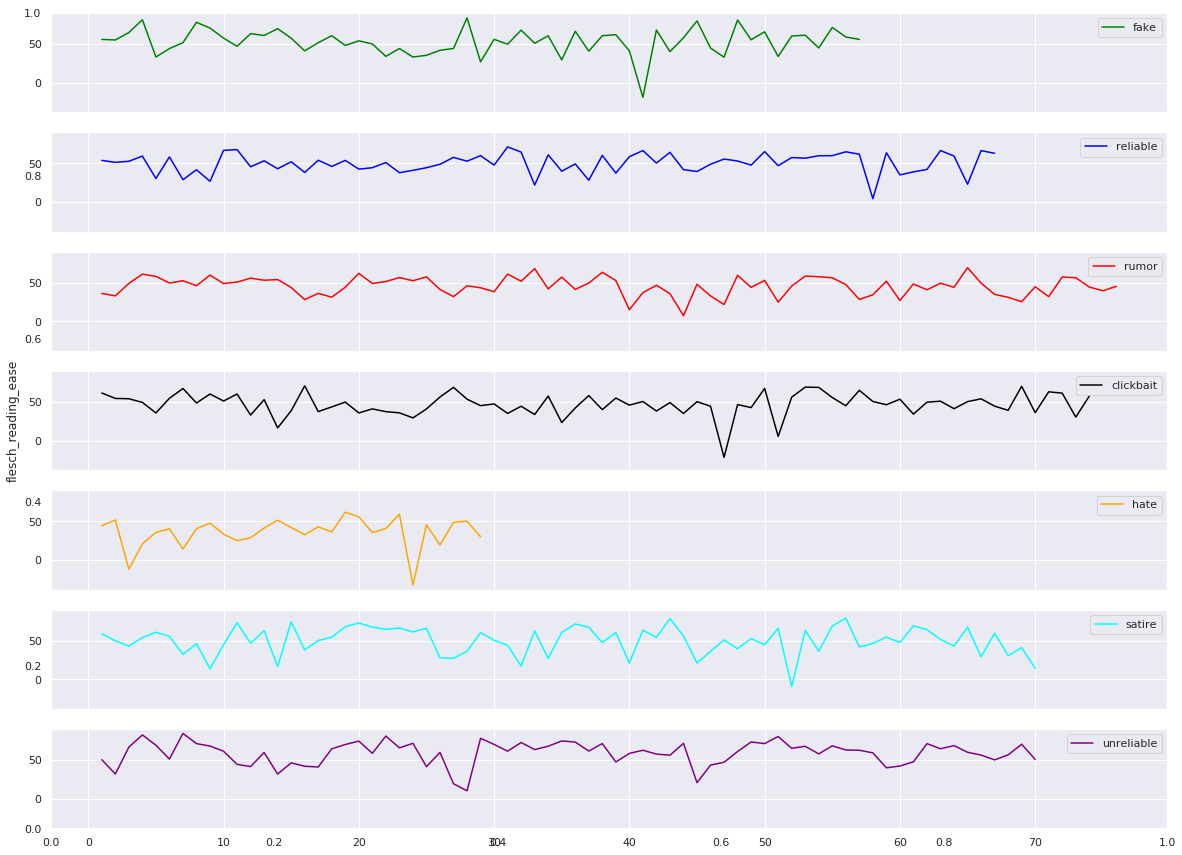

In [171]:
plot_this('flesch_reading_ease')

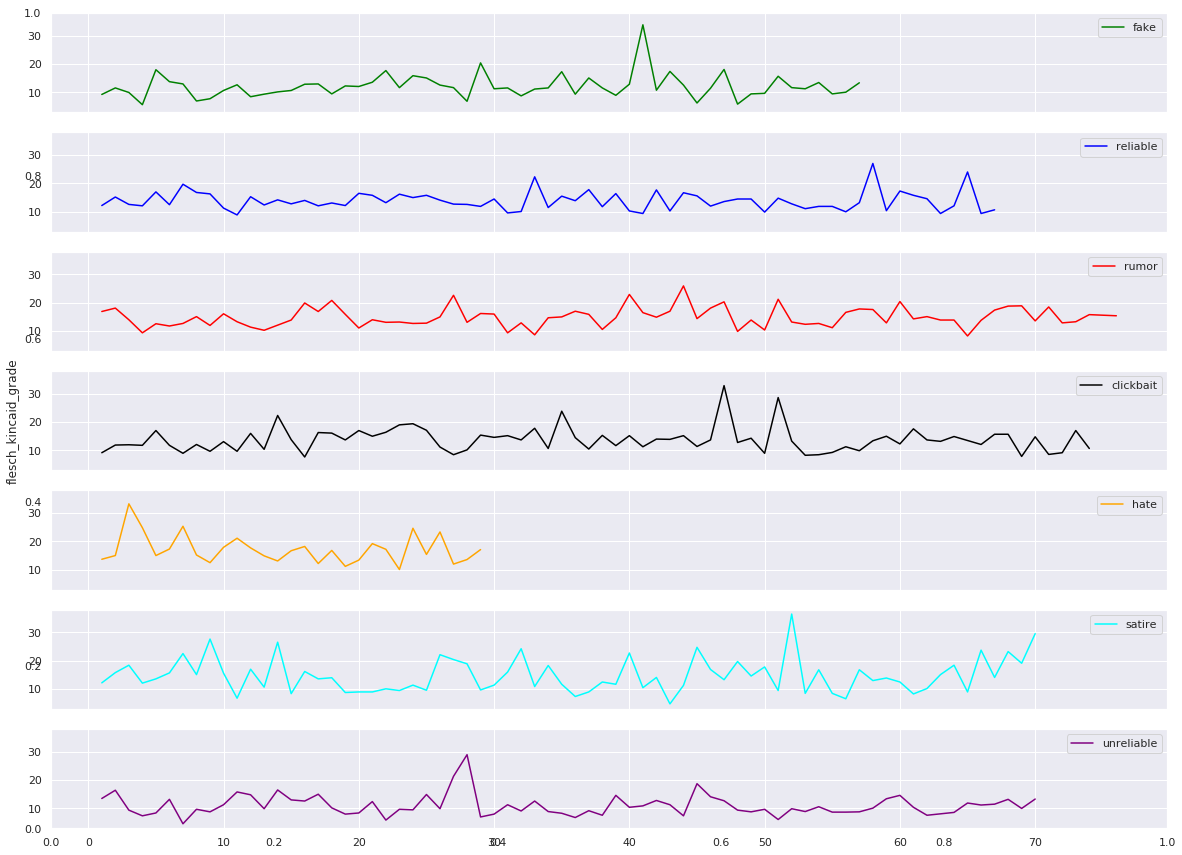

In [170]:
plot_this('flesch_kincaid_grade')

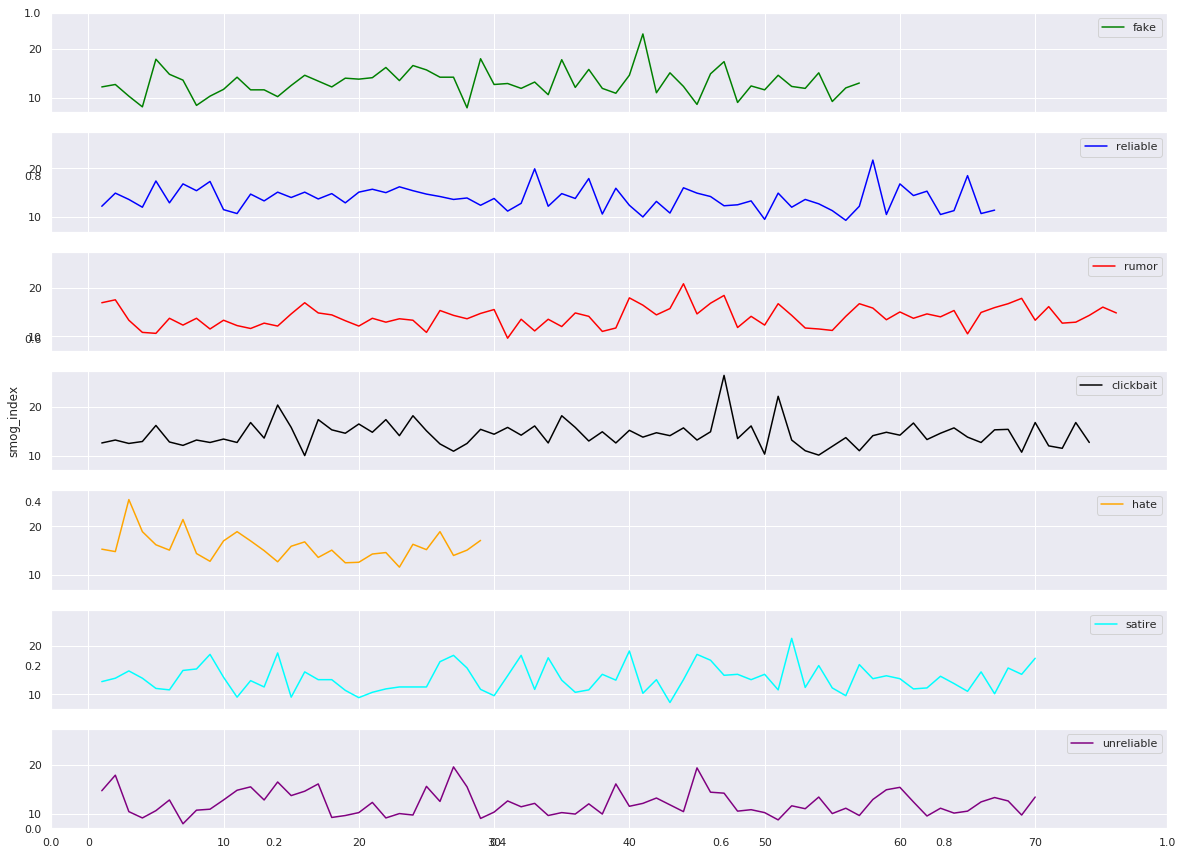

In [172]:
plot_this('smog_index')

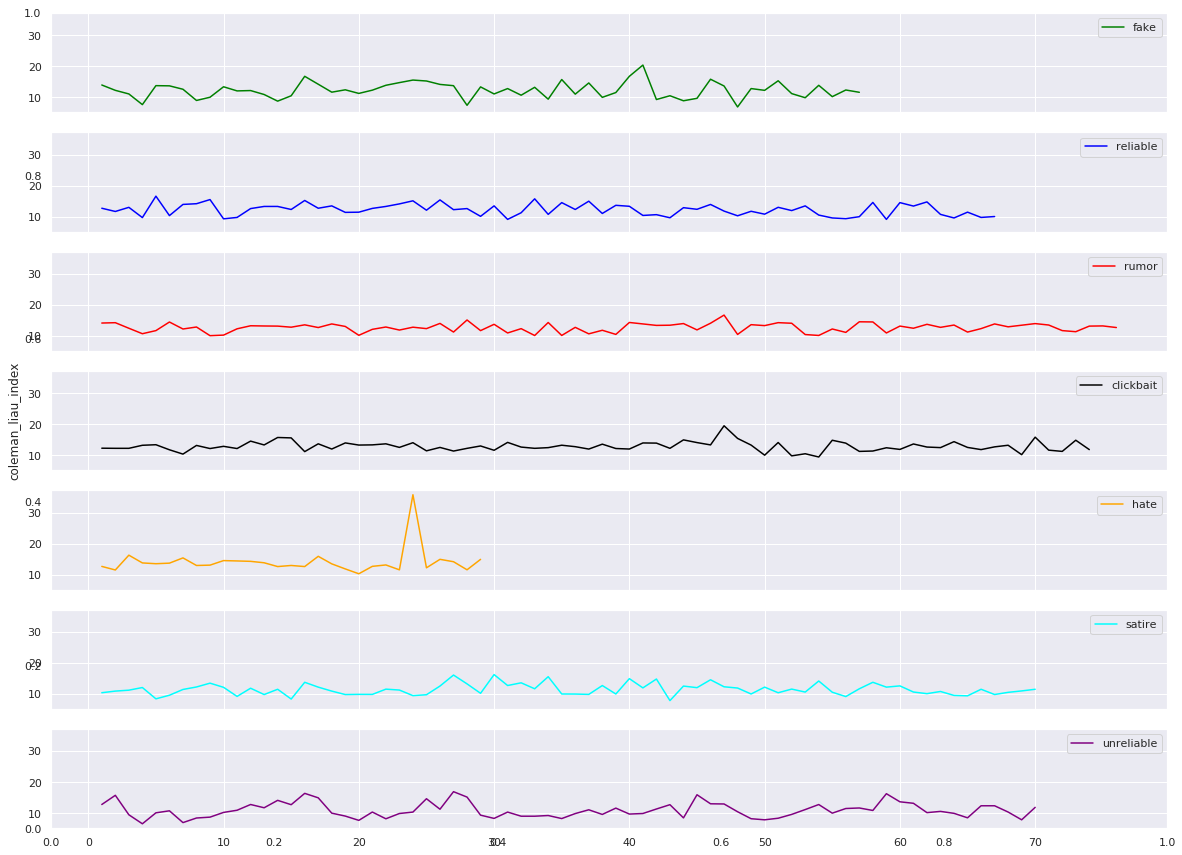

In [173]:
plot_this('coleman_liau_index')

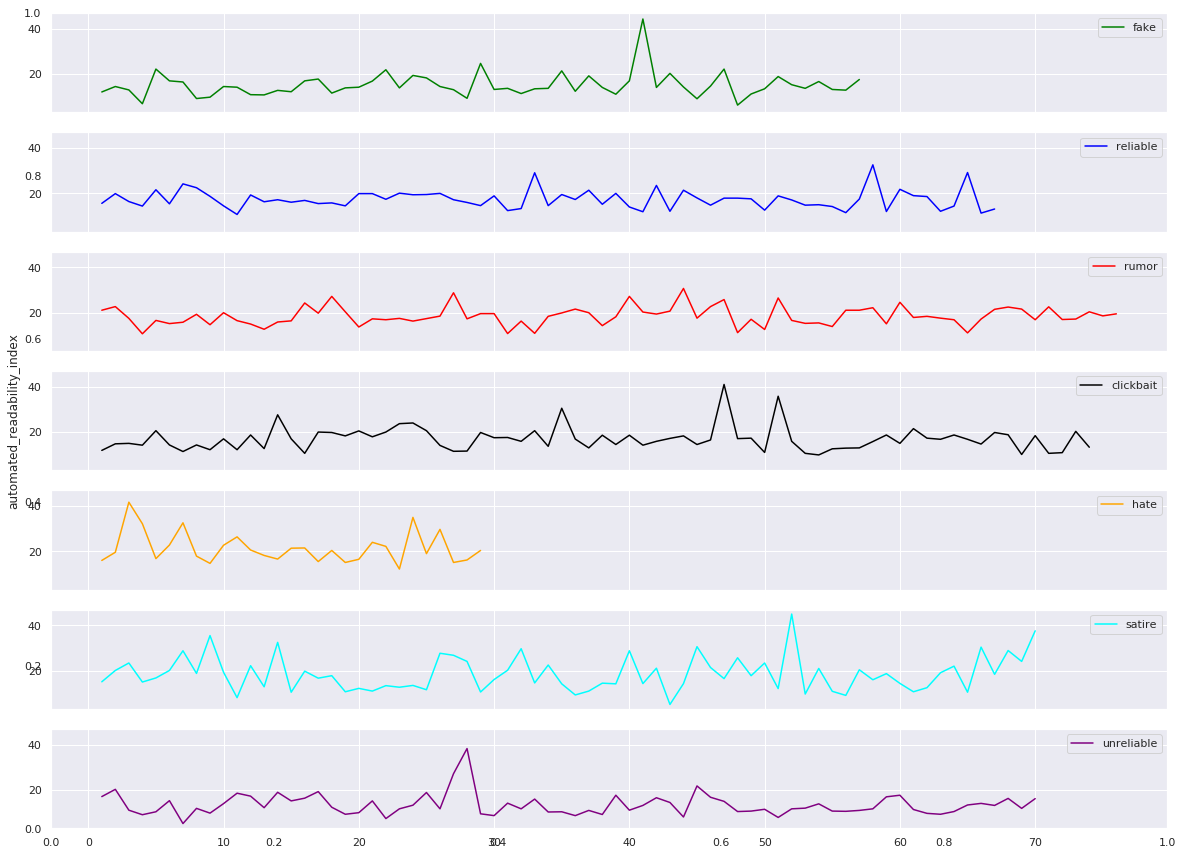

In [174]:
plot_this('automated_readability_index')

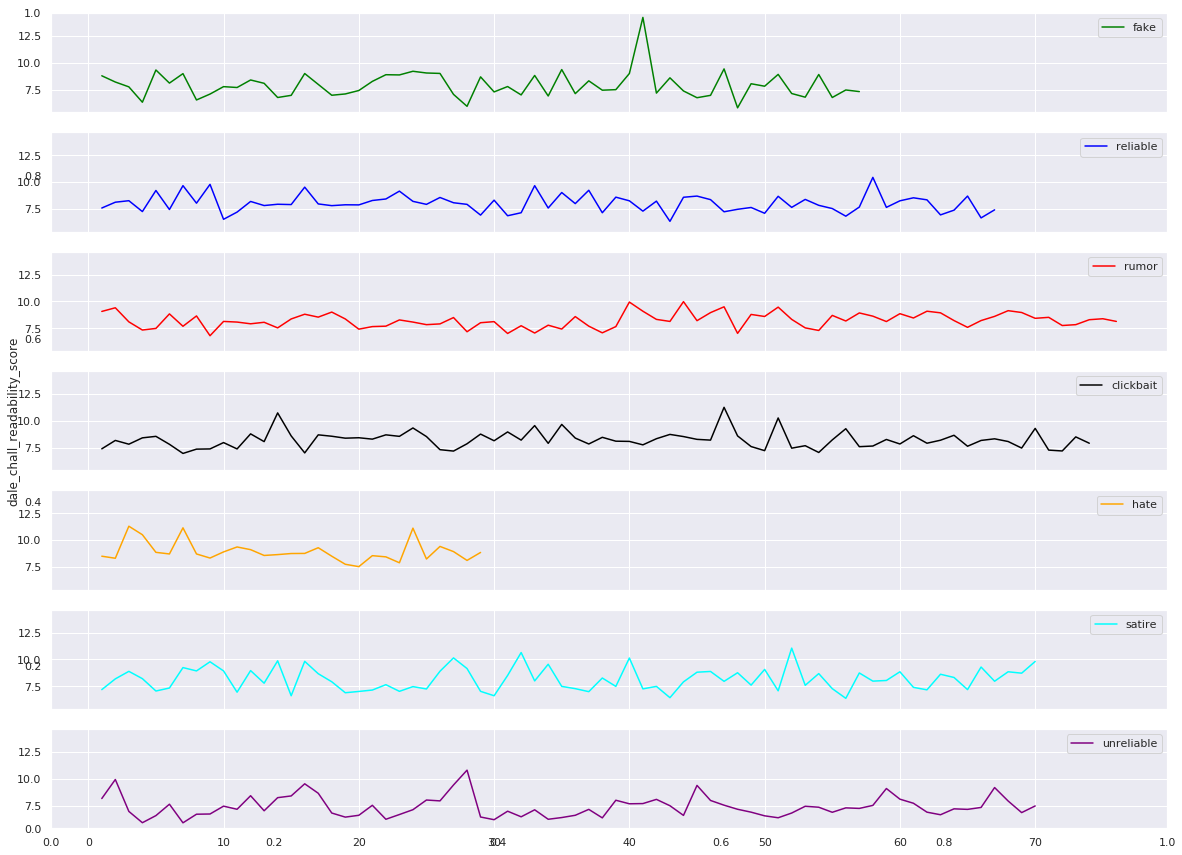

In [175]:
plot_this('dale_chall_readability_score')

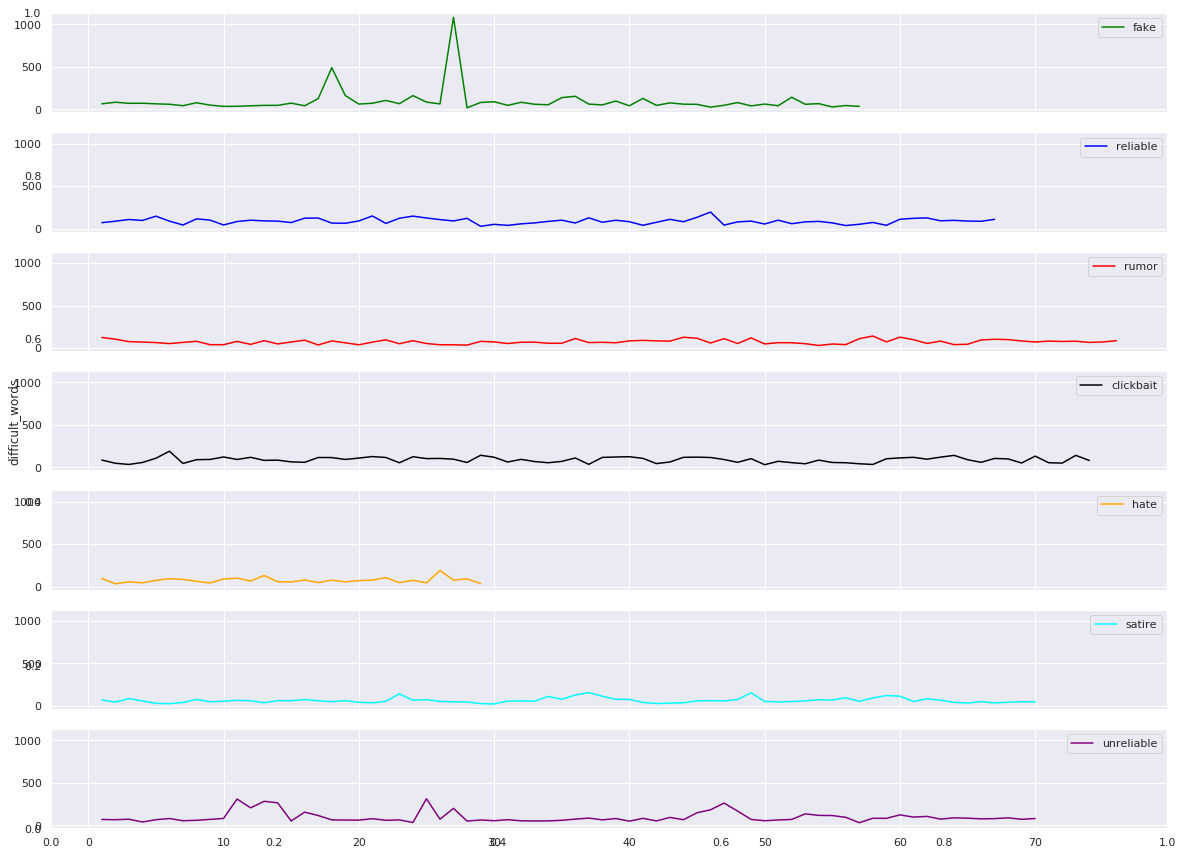

In [176]:
plot_this('difficult_words')

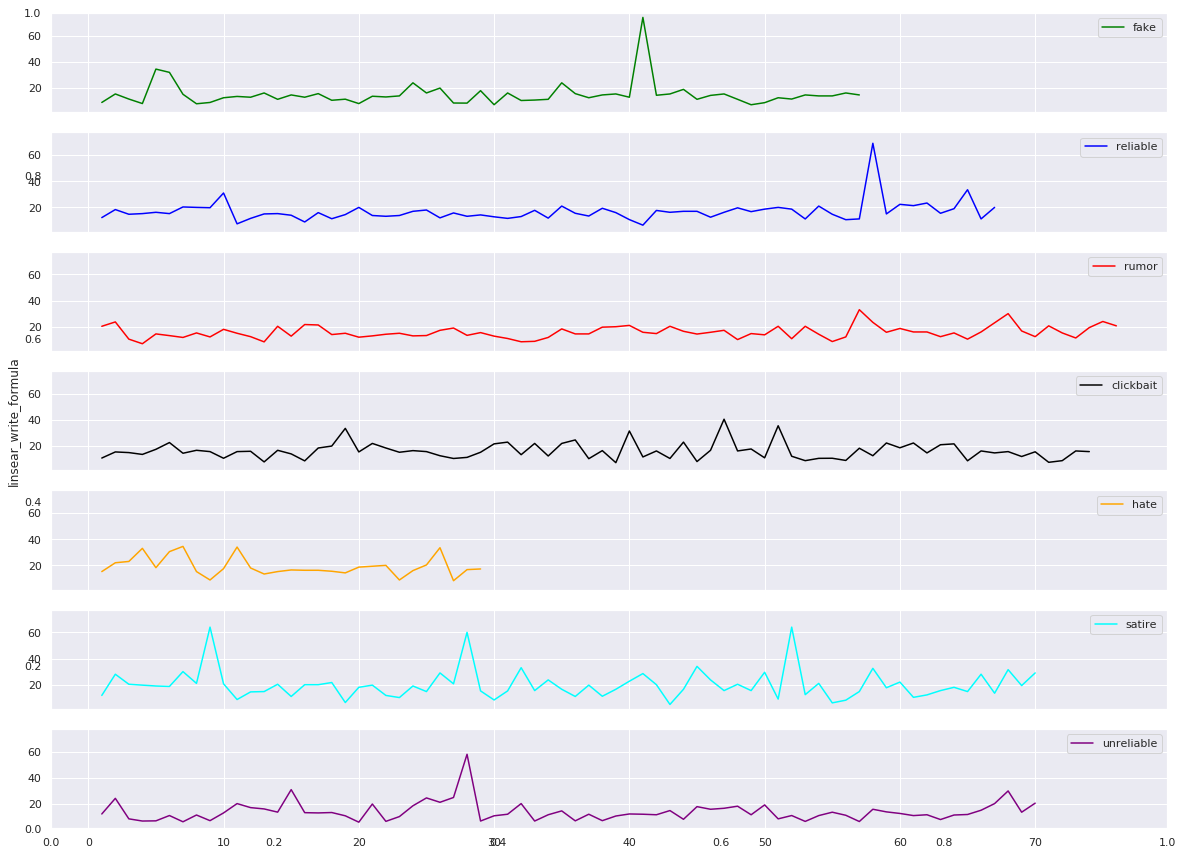

In [177]:
plot_this('linsear_write_formula')

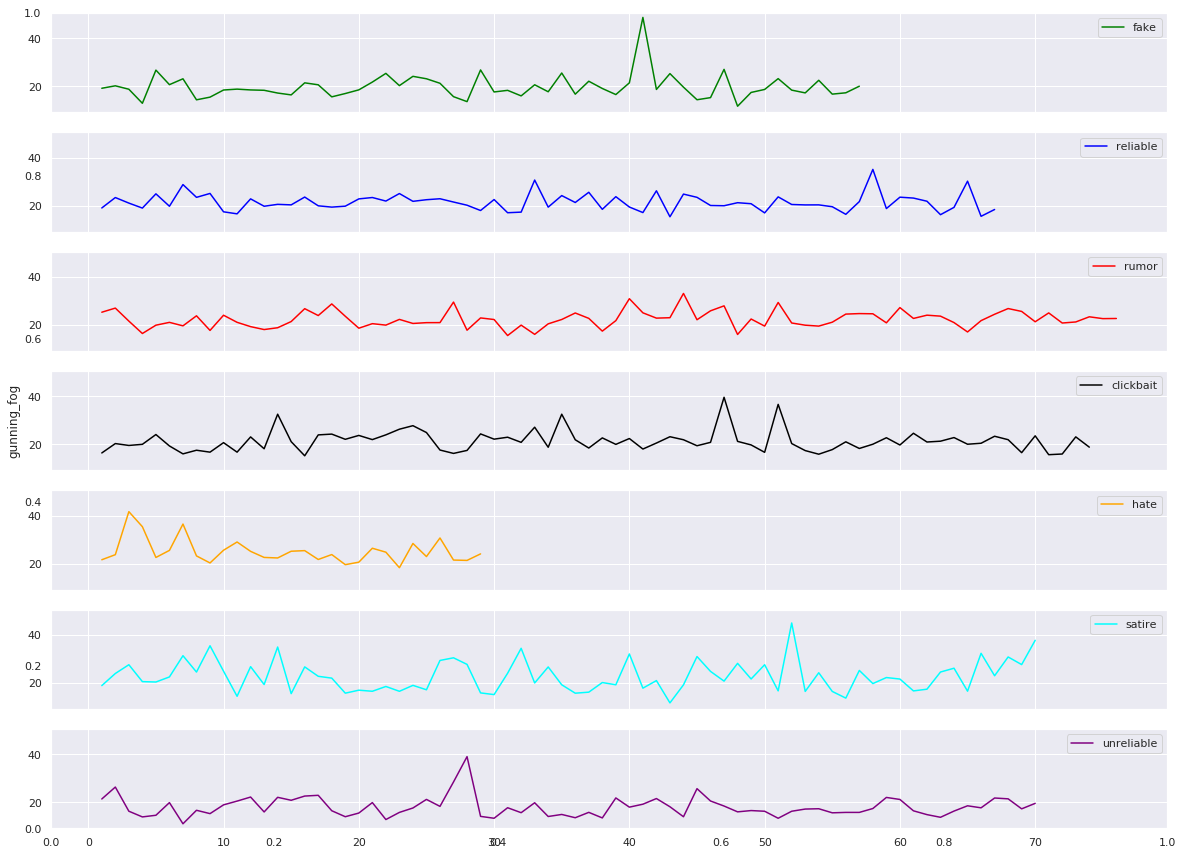

In [178]:
plot_this('gunning_fog')